## Convolutional Neural Networks and Computer Vision with TensorFlow

* Mostly Convolutional Neural Networks are used to analyze Images and based on the analysis make predictions.

* For Example:- Classify wither an image is of pizza or steak and detect wither a particular object appears in the image or not.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:07<00:00, 190MB/s]
100% 1.06G/1.06G [00:07<00:00, 145MB/s]


In [ ]:
import zipfile

zif_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zif_ref.extractall('/content')
zif_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


### A little Tweeking

#### Generator: Divides the data into batches. Suppose you have 10,000 images so you do not work with all the images at once. You divide them into little batches and work with them.

In [ ]:
# Generators image dataset from directory.

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
train_ds.class_names

In [ ]:
# Normalize the data

def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_dataset = validation_dataset.map(process)

In [ ]:
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',
                 activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',
                 activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history=model.fit(train_ds, epochs=10, validation_data=validation_dataset)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 92ms/step - accuracy: 0.5472 - loss: 1.9855 - val_accuracy: 0.5484 - val_loss: 5.3141
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6285 - loss: 0.6454 - val_accuracy: 0.5904 - val_loss: 0.6500
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.6665 - loss: 0.6074 - val_accuracy: 0.6726 - val_loss: 0.6007
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.7355 - loss: 0.5267 - val_accuracy: 0.6876 - val_loss: 0.5999
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.7716 - loss: 0.4863 - val_accuracy: 0.7836 - val_loss: 0.4736
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.8139 - loss: 0.3972 - val_accuracy: 0.7784 - val_loss: 0.4755
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 57s 92ms/step - accuracy: 0.8654 - loss: 0.3106 - val_accuracy: 0.7658 - val_loss: 0.6159
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 86ms/step - accuracy: 0.9157 - loss: 0.2115 - 

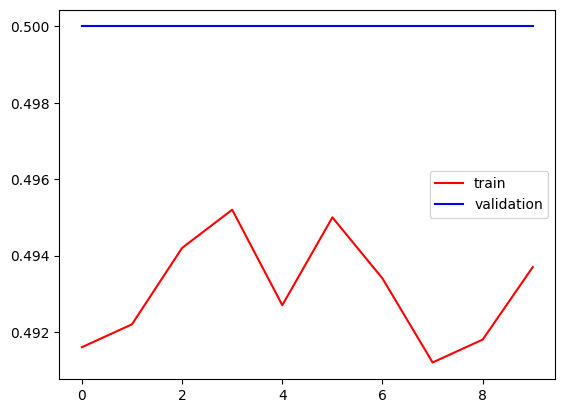

In [ ]:
# Without Dropout and Batch Normalization
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


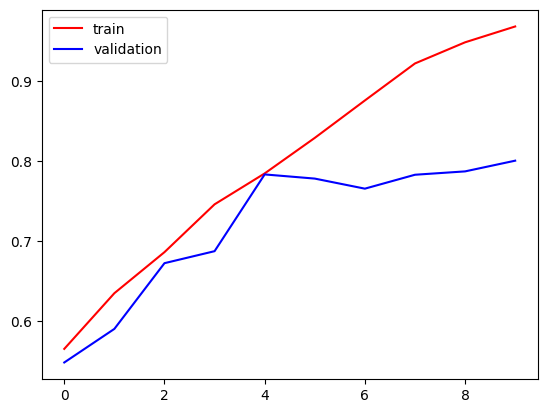

In [ ]:
# With Dropout and Batch Normalization
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()


#### Ways to improving Algorithms

* Add More Data
* Data Augmentation
* L1/L2 Regularizer
* Dropout
* Batch Normalization
* Reduce Complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.png')

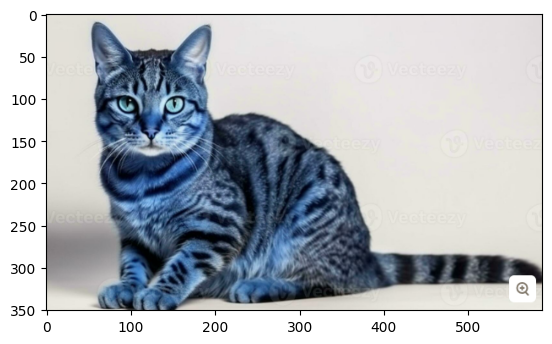

In [ ]:
# Show the image
plt.imshow(test_img)

In [ ]:
test_img.shape

(351, 588, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
predict =model.predict(test_input)
predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[1.]], dtype=float32)

In [ ]:
if predict[0]==0:
  print("Dog")
else:
  print("Cat")

Cat


In [ ]:
test_img = cv2.imread('/content/dog.png')
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

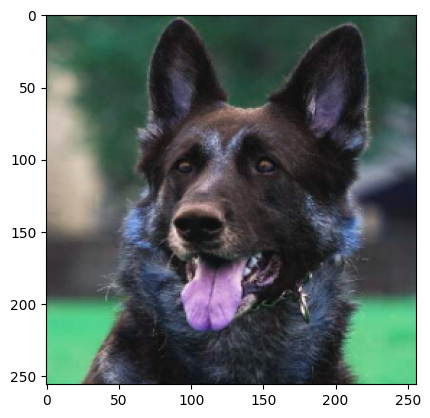

In [ ]:
plt.imshow(test_img)

In [ ]:
predict = model.predict(test_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:
if predict[0]==0:
  print("Dog")
else:
  print("Cat")

Dog


### Data Augmentaiton:
A simple and effective technique to reduce overfitting.
For Data Augmentation read "Building powerful image classification models using very little data"
* We apply various transformations to original images to make new images to combat overfitting.


In [ ]:
# Import libraries for image generator from keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img = image.load_img('/content/cat.png', target_size=(200,200))

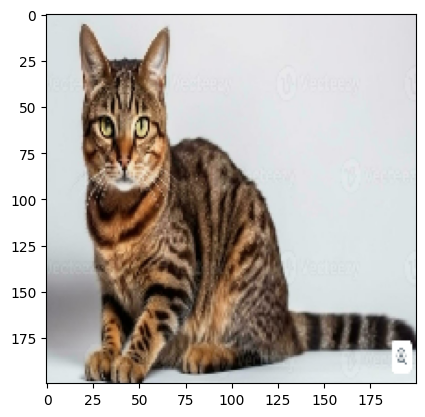

In [ ]:
plt.imshow(img)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 30, # value in degree(0-180), a range within which to randomly rotate pictures
    shear_range =0.2, # Shear-mapping is an affine transformation that displaces each point in a fixed direction.
    zoom_range = 0.2, # For randomly zooming inside pictures.
    horizontal_flip = True, # Random flipping half of the images horizontally.
    width_shift_range = 0.2,
    height_shift_range = 0.2

    # width and height shift_range are ranges (as a fraction of total width
    # or height)within which to randomly translate pictures vertically or
    # horizontally.
)

In [ ]:
# Converting image to a numpy arrary
img = image.img_to_array(img)
img.shape

(200, 200, 3)

In [ ]:
# We need to define the input batch
input_batch = img.reshape(1,200, 200, 3)

In [ ]:
# Looping through image to create the augmented objects

i=0

for output in datagen.flow(input_batch, batch_size=1, save_to_dir='/content/aug'):
  i = i+1

  if i==10:
    break


In [ ]:
import cv2
img_to_display = cv2.imread('/content/aug/_0_7100.png')
plt.imshow(img_to_display)

### Convolutional Neural Networks and Computer Vision with TensorFlow


In [8]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2025-09-09 10:28:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   186MB/s    in 0.6s    

2025-09-09 10:28:37 (186 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [9]:
# Extracting zip files
import zipfile
zip_ref = zipfile.ZipFile('/content/pizza_steak.zip','r')
zip_ref.extractall()
zip_ref.close()

In [10]:
!ls pizza_steak

test  train


In [11]:
!ls pizza_steak/train/

pizza  steak


In [12]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [13]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


#### **os.walk()**
* Generates a sequence of directory tree contents starting at the top.
* It recursively visits all subdirectories and yield information about each directory if exists
* It returns a generator that you can iterate over

The structure of directory is
(dirpath, dirnames, filenames)
* dirpath:- A string, the current directory path being walked
* dirnames:- List of subdirectories inside dirpath
* filenames:- A list of names of the files inside dirpath



In [14]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [15]:
# Another way to find out how many images are in a folder
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [16]:
# Getting the class names programatically
import pathlib
data_dir= pathlib.Path("pizza_steak/train/")
# data_dir.glob('*')
# data_dir is a usually a Path object from python pathlib
# .glob('*') means list everything inside this directory(file and folders)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


### Typical Architecture of Convolutional Neural Network

- **Input Images:** Target images you would like to discover pattern in

- **Input Layer:** Takes Target Images, Preprocess them for further analysis

*input_shape = [batch_size, image_height, image_width, color_channels]*

- **Convolution Layer:** Extracts/Learn the most important features from Target Images
*tf.keras.layers.ConvXD (X can be multiple values)*

- **Pooling Layer:** Reduces the dimensionality of learned image features
*tf.keras.layers.AvgPool2D or tf.keras.layers.MaxPool2D*


- **Fully Connected Layer:** Further Refines learned features from convolution Layers
*tf.keras.layers.Dense*

- **Output Layer:** Takes learned features and outputs them in shape of target labels.


**The Architecture we are using down is a scaled down version of *VGG-16*, a Convolutional Neural Network which came 2nd in the 2014, ImageNet Classification Competition.**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)
valid_data = train_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)
# Create a CNN Models same as Tiny VGG
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(pool_size=2, padding='valid'),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10,3, activation='relu'),
  MaxPool2D(2),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 225ms/step - accuracy: 0.5076 - loss: 0.7004 - val_accuracy: 0.6780 - val_loss: 0.6306
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.7613 - loss: 0.5611 - val_accuracy: 0.8120 - val_loss: 0.3873
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.8367 - loss: 0.3843 - val_accuracy: 0.8160 - val_loss: 0.3941
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.8360 - loss: 0.3816 - val_accuracy: 0.8680 - val_loss: 0.3343
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.8525 - loss: 0.3341 - val_accuracy: 0.8660 - val_loss: 0.3407


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

**With a few EPOCHS we achieved 85% accuracy. Let's build another model without convolution operation and find the accuracy**

In [ ]:
tf.random.set_seed(42)

# Create a model with 1-Flatten layer and 3 Dense Layers
model_2 = Sequential([
  Flatten(input_shape=(224,224,3)),
  Dense(4, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

'''
steps_per_epoch=len(train_data)
The training data is split into batches.
1 step = model sees 1 batch.
len(train_data) = number of batches.

Suppose we have
1000 Training Images
32 Batch Size
So, No of Steps in one EPOCH = 1000/32 = 31.25
So, PER EPOCH steps_per_epoch = len(train_data) means
"In one epoch run through all 32 batches (Covering all 1000 images)

'''

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.5151 - loss: 0.9980 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.4916 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.5009 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.4920 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.5048 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931


In [ ]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

#### **Some Observations**

- From the results it seems that the model did not learn anything. It's accuracy is equivalent to guessing
- Another most important factor to look for is the number of parameters.
model_1 has 31,101 parameters while model_2 has 602,141 parameters

- Trainable Parameters:- Trainable parameters are patterns a model can learn from data. In case of Convolutional Neural Network the model sort out and learn the most important patterns in an image. Even though there are small no of parameters in Convolutional Neural Network, these are the most important parameters describing the reality.

Let's increase the number of dense layers and neurons per dense layer

In [ ]:
tf.random.set_seed(42)

# Create a neural network with 1 Flatten layer having (224,224,3) as input layer. 4 dense layers
model_3 = Sequential([
  Flatten(input_shape=(224,224,3)),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(100, activation='relu'),
  Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - accuracy: 0.6146 - loss: 6.4391 - val_accuracy: 0.6400 - val_loss: 2.0205
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.7092 - loss: 1.3864 - val_accuracy: 0.6320 - val_loss: 1.0499
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.7220 - loss: 0.7775 - val_accuracy: 0.7320 - val_loss: 0.5431
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.7858 - loss: 0.4582 - val_accuracy: 0.7940 - val_loss: 0.4263
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - accuracy: 0.8002 - loss: 0.4532 - val_accuracy: 0.7080 - val_loss: 0.6154


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

**The no of Trainable Parameters has further increased to 15,073,201, a logritmic increase**

### Let's Return back to the Pizza and Steak Class and Analyze in detail

### Better to Visualize a few samples

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


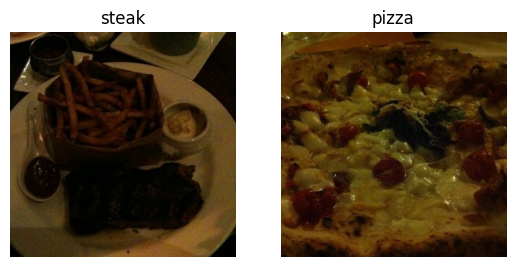

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

**Preprocessing Data (For Model Preparation)**

- A good idea for image processing tasks is to divide data into train and test sets
- The train set inside has folders for each class
- Same folder structure exists for testing as well


In [6]:
test_dir ='pizza_steak/test/'
train_dir = 'pizza_steak/train/'

**Batch** is a small subset of the dataset a model looks at during training.
- We divide data into batches to make it easy for model to learn
- Rather than opening 10,000 images at once we show the model only a subset, 32 mostly, to learn the most important features
- Why **32** because research has proven that this is the most effective number for batch size.



In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

**ImageDataGenerator:**
The ImageDataGenerator class helps us prepare our images into **Batches** as well as perform **Transformations** on them as they get loaded into the model.
The **rescale** is a kind of transformations we are doing.
**Data Augmentation** is another type of Transformation that we can do on our images.
The **flow_from_directory** function helps us load our images from their respective directories applying the **prescribed** transformation.

In [17]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Functions Explanation
- Because of the structuring of directories, the class name gets inferred by the subdirectory structure such as **train_dir** and **test_dir**.
- The **target_size** parameter defines the size (height and width).
- The **class_mode** value of **binary** defines our classification problem type. If we have more than two classes then we would use **categorical**
- The **batch_size** defines how many images will be in each batch. We have **batch_size=32** which is default somehow.

In [19]:
images, labels = next(train_data)
len(images), len(labels)

(32, 32)

- **train_data** has images in batches and labels of size 2. It is like a big set of images with labels.
- The **next** function fetches each batch along with images.

In [21]:
images[1], images[1].shape

(array([[[0.7058824 , 0.5176471 , 0.227451  ],
         [0.8235295 , 0.63529414, 0.3372549 ],
         [0.8862746 , 0.7058824 , 0.40000004],
         ...,
         [0.44705886, 0.28627452, 0.30980393],
         [0.60784316, 0.48627454, 0.47450984],
         [0.5921569 , 0.46274513, 0.43529415]],
 
        [[0.8196079 , 0.6392157 , 0.3372549 ],
         [0.8588236 , 0.6784314 , 0.37254903],
         [0.9294118 , 0.75294125, 0.43529415],
         ...,
         [0.40000004, 0.22352943, 0.2509804 ],
         [0.5372549 , 0.4039216 , 0.40000004],
         [0.68235296, 0.5647059 , 0.53333336]],
 
        [[0.90196085, 0.7254902 , 0.40784317],
         [0.8941177 , 0.7294118 , 0.40000004],
         [0.95294124, 0.78823537, 0.45098042],
         ...,
         [0.33333334, 0.12156864, 0.1764706 ],
         [0.40784317, 0.24313727, 0.25882354],
         [0.6156863 , 0.49411768, 0.47450984]],
 
        ...,
 
        [[0.34509805, 0.8313726 , 0.8705883 ],
         [0.41960788, 0.94117653, 0.96862

**Creating a model(starting with a baseline)**
- A simple **heuristic for computer vision models** is to use an architecture which perform well on **ImageNet**. ImageNet is a diverse collection of images for different computer vision models
- Let's start with a simple model with 3-layers initially.

In [22]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [23]:
# Create a model with 3 convolutional layers

model_4 = Sequential([
  Conv2D(10, 3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224,224,3)),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 223ms/step - accuracy: 0.6948 - loss: 0.5930 - val_accuracy: 0.7840 - val_loss: 0.4381
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.8117 - loss: 0.4099 - val_accuracy: 0.8420 - val_loss: 0.3364
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.8611 - loss: 0.3309 - val_accuracy: 0.8300 - val_loss: 0.3621
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.8892 - loss: 0.2872 - val_accuracy: 0.8460 - val_loss: 0.3531
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9170 - loss: 0.2307 - val_accuracy: 0.8320 - val_loss: 0.3563


- **2D** means that input is 2D (height, width)
- **filters** these are the no of features extractors, we have 10 filters in each layer
- **kernel_size** Size of each filter which is 3*3
- **stride** No of pixels the filter will move across the image. 1 means that filter will move 1 pixel.
- **padding** this is either *valid* or *same*. **same** adds zeros to outside of the image so the resulting output of the convolution layer is the same as input, while **valid** cuts the extra pixels where the filter does not fit.

- **binary_crossentropy:** Since we are working on a binary classification problem, we will use **binary_crossentropy** as our loss function. For Multi-Class classification we use **categorical_crossentropy**.

- **steps_per_epoch -** this is the number of batches a model will go through per epoch, in our case, we want our model to go through all batches so it's equal to the length of train_data (1500 images in batches of 32 = 1500/32 = ~47 steps)

- **validation_steps -** same as above, except for the validation_data parameter (500 test images in batches of 32 = 500/32 = ~16 steps)


<Axes: >

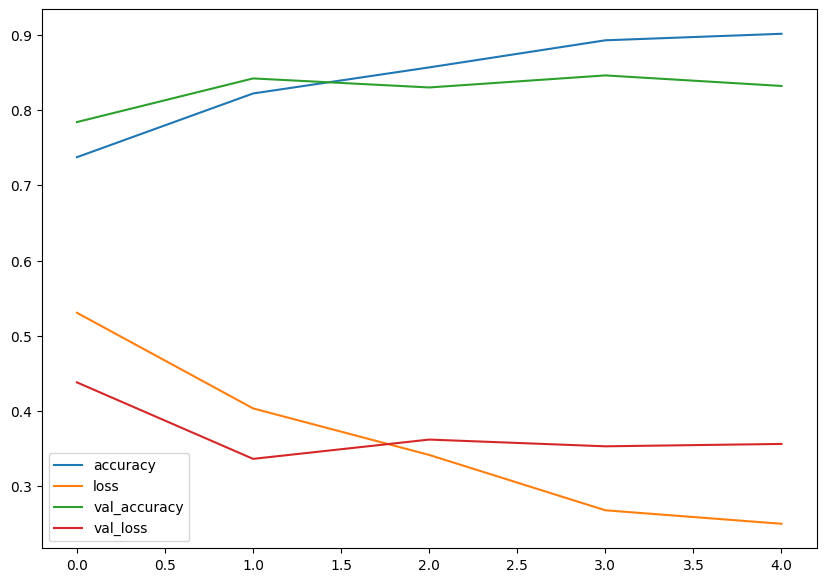

In [24]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))


### Results Interpretation

- Judging from the results it seems that the model is **overfitting** on the training data
- **Validation loss flattens** while **training loss** decreases.
- It seems that the model has learnt the **training data** well but cannot generalize as the **validation** results are not good.


In [25]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

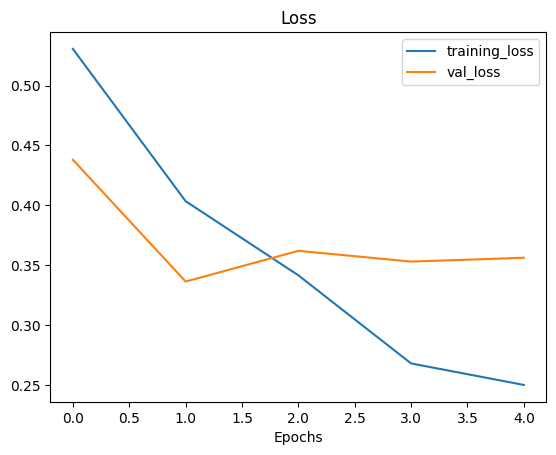

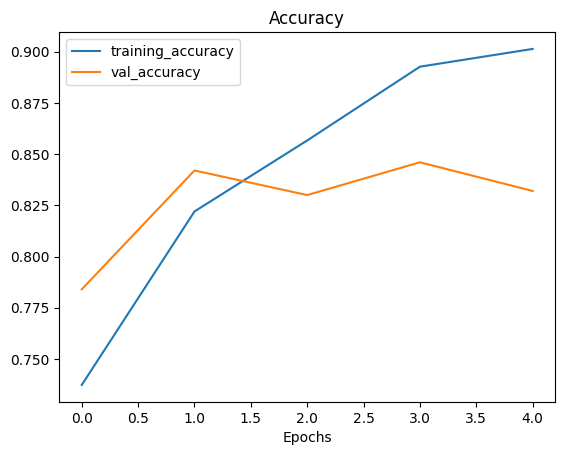

In [26]:
plot_loss_curves(history_4)

**The Ideal Scenario for these two curves is to follow each other**

In [27]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 109, 109, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 118810)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       118,811 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 362,735 (1.38 MB)

 Trainable params: 120,911 (472.31 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 241,824 (944.63 KB)

**Adjusting the Model Parameters**

Fitting a machine learning model is an iterative process.
The model will further overfit if we
Increase the number of Convolution Layers

*  Increasing the no of Convolution Layers
*  Increasing the number of Convolution Filters
*  Adding another dense layer to the output of out flattened Layer

Our Main Task is that both the **Training** and **Validation** curves better align with each other.

Our model is not performing well in real world.
We will built other two models

*   A ConvNet with max pooling
*   A ConvNet with max pooling and data augmentation

So, our model is
Input --> Conv Layers --> Max Pooling --> Fully Connected (dense Layer) as Output



In [28]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(pool_size=2),
  Flatten(),
  Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**MaxPool2D** layer is used to figure out the *most important* of those features.

In [29]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 172ms/step - accuracy: 0.5827 - loss: 0.6645 - val_accuracy: 0.7600 - val_loss: 0.5132
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.7396 - loss: 0.5261 - val_accuracy: 0.7700 - val_loss: 0.4672
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8075 - loss: 0.4367 - val_accuracy: 0.8600 - val_loss: 0.3390
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.8301 - loss: 0.3824 - val_accuracy: 0.8280 - val_loss: 0.3643
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.8389 - loss: 0.3770 - val_accuracy: 0.8540 - val_loss: 0.3153


**The Model** is performing worse on the training set but better on **validation set**.

In [30]:
model_5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

- With the introduction of **MaxPooling2D** the model performances deterioted.
With each **MaxPooling2D** the output is halved as only important features are extracted while granularity is lost.
- The bigger the **pool_size**, the more the **MaxPooling2D** will squeeze the features out of the image.

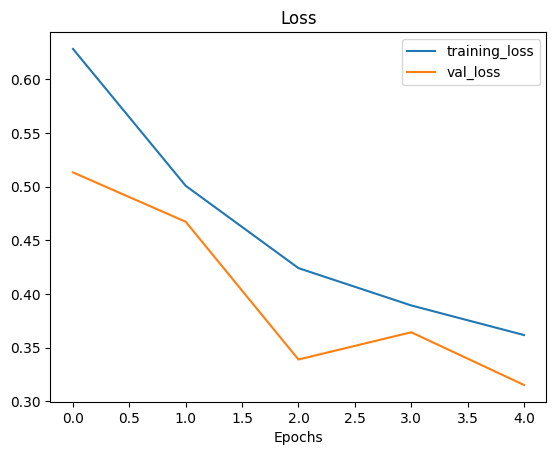

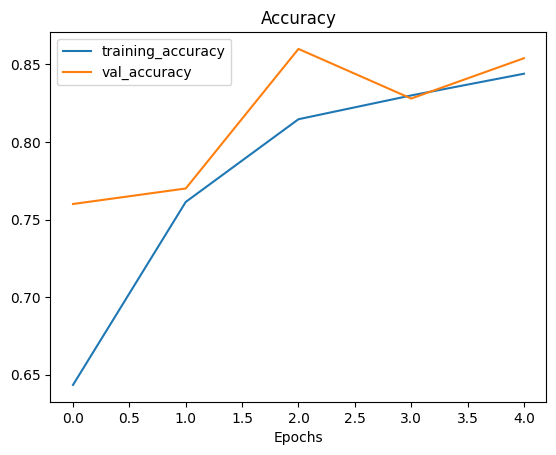

In [31]:
plot_loss_curves(history_5)

- As seen above **training curves getting closer** and we can safely say that to some extent we have solved the **overfitting** issue.
- However, model results are not too good.
- Let's use another trick **Data Augmentation**
- To implement data augmentation, we will use **ImageDataGenerator** class


In [33]:
'''
rotation_range=20: Rotate the image slightly between 0 and 20 degress
shear_range=0.2: Shear the image
zoom_range=0.2: Zoom into the image
width_shift_range=0.2: Shift the image horizontally
height_shift_range=0.2: Shift the image vertically
horizontal_flip=True: Flip the image horizontally

'''


train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=20, #Rotate the image
                                             shear_range=0.2, #Shear the image
                                             zoom_range=0.2, #Zoom into the image
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)


train_datagen= ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



**Data Augmentation** is a process of altering out training data to have more diversity and in turn allowing our model to learn more generalized patterns.
*   **Altering** means adjusting the rotation of an image, flipping it, cropping it or something similar
*  Real world images are not uniform and have many distortions and such non-uniformity can only be learnt using data augmentation.

**Important**
- **ImageDataGenerator:** Data Augmentation is applied only to the training data when it is loaded into our model. Our images are left as they are in the directories but are randomly manipulated when loaded into the model.



In [34]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


**As seen in the above results above no extra images are added. The no of images are same.**

In [36]:
# Get data batch samples
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented) # Note: labels aren't augmented, they stay the same


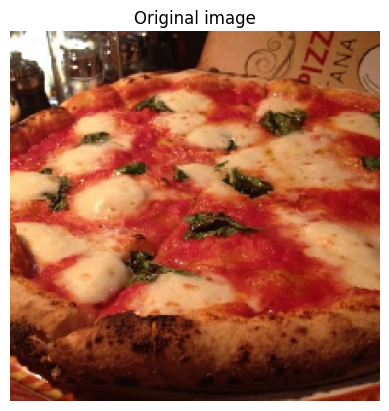

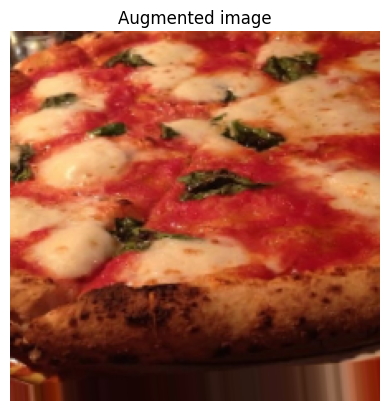

In [40]:
import random
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

**Should we use Data Augmentation or Not**
- Data augmentation is a way to try and **prevent a model overfitting.** If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.
